In [11]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('rainfall.csv')

#Parse date column
df["datetime"] = pd.to_datetime(df["datetime"], format="%d/%m/%y", errors='coerce')
df = df.dropna(subset=["datetime", "solarradiation"]).reset_index(drop=True)

#Create lag features
n_lags = 3
for lag in range(1, n_lags + 1):
    df[f'solarradiation_lag_{lag}'] = df['solarradiation'].shift(lag)

df = df.dropna().reset_index(drop=True)

In [13]:
features = [f'solarradiation_lag_{i}' for i in range(1, n_lags + 1)]
X = df[features]
y = df['solarradiation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)  

X_train shape: (564, 3)
X_test shape: (141, 3)
y_train shape: (564,)
y_test shape: (141,)


In [14]:
#Evaluation Function
def evaluate_regression(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # Test metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{name} Regression Performance:\n")
    print("Train:")
    print(f" MAE : {train_mae:.2f}")
    print(f" RMSE: {train_rmse:.2f}")
    print(f" R²   : {train_r2:.3f}")
    
    print("\nTest:")
    print(f" MAE : {test_mae:.2f}")
    print(f" RMSE: {test_rmse:.2f}")
    print(f" R²   : {test_r2:.3f}")


    #For Train Data- to check for overfitting
    plt.figure(figsize=(10,5))
    plt.plot(y_train.values[:100], label='Actual', marker='o')
    plt.plot(y_train_pred[:100], label='Predicted', marker='x')
    plt.title(f"{name} - Solar Radiation Prediction (Training Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Solar Rad")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #For Test Data
    plt.figure(figsize=(10,5))
    plt.plot(y_test.values[:100], label='Actual', marker='o')
    plt.plot(y_test_pred[:100], label='Predicted', marker='x')
    plt.title(f"{name} - Solar Radiation Prediction (Testing Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Solar Rad")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Linear Regression Regression Performance:

Train:
 MAE : 26.57
 RMSE: 37.82
 R²   : 0.553

Test:
 MAE : 30.53
 RMSE: 42.78
 R²   : 0.527


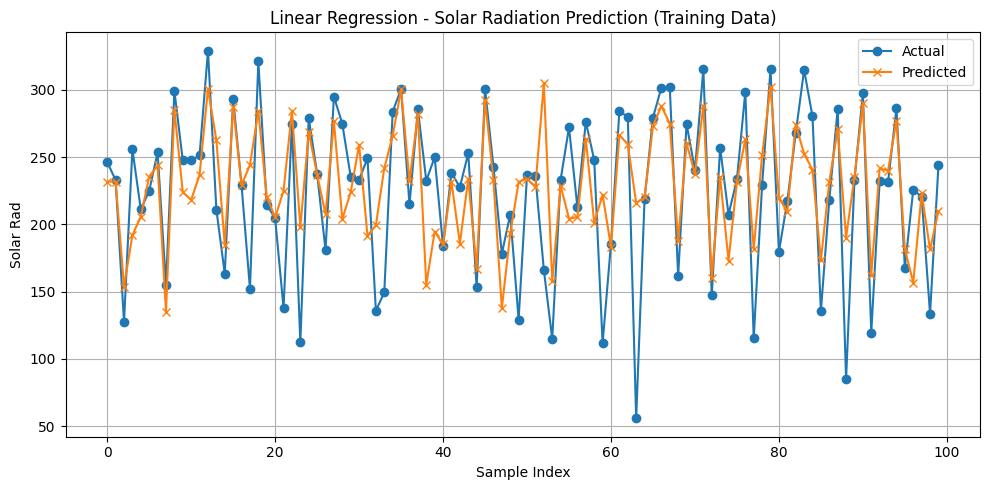

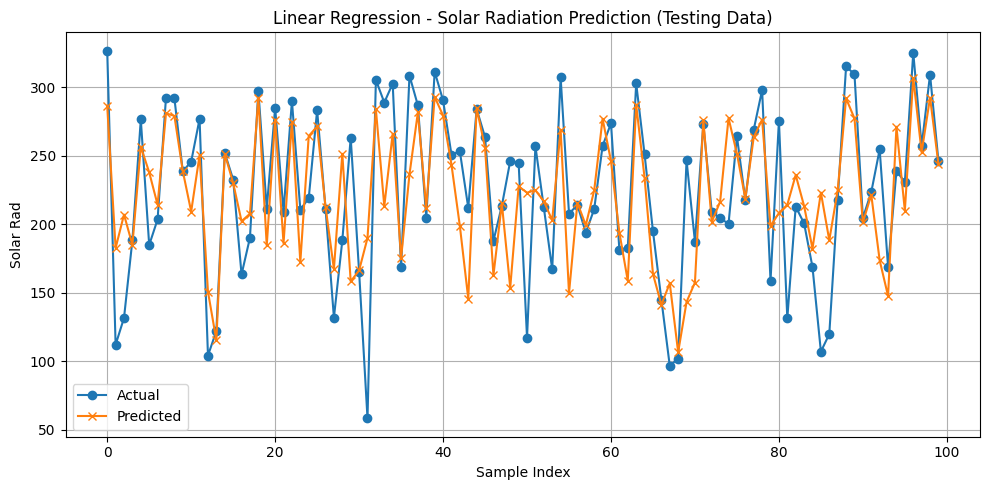

In [15]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_regression("Linear Regression", lr, X_train, y_train, X_test, y_test)

Lasso Regression Regression Performance:

Train:
 MAE : 26.57
 RMSE: 37.82
 R²   : 0.553

Test:
 MAE : 30.53
 RMSE: 42.78
 R²   : 0.527


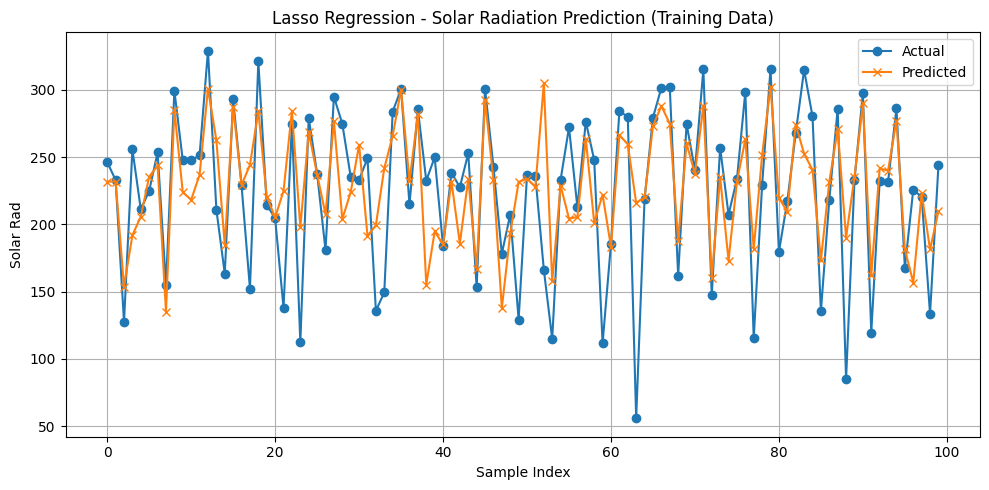

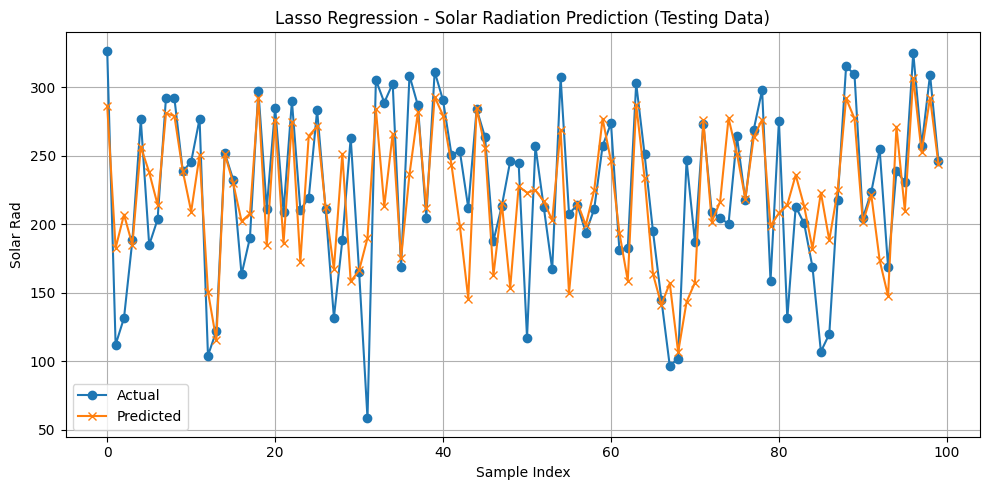

In [16]:
#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_regression("Lasso Regression", lasso,X_train, y_train, X_test, y_test)


Random Forest Regressor Regression Performance:

Train:
 MAE : 23.25
 RMSE: 32.48
 R²   : 0.671

Test:
 MAE : 29.74
 RMSE: 41.42
 R²   : 0.556


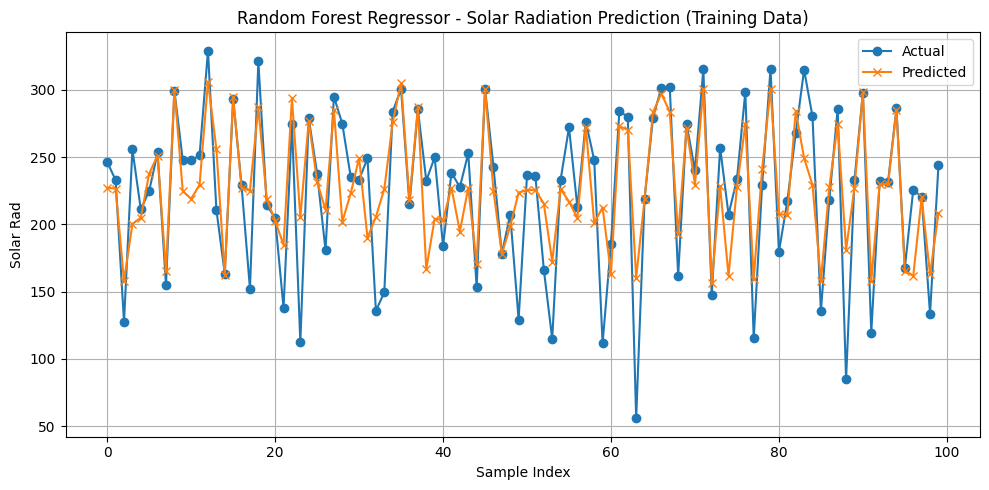

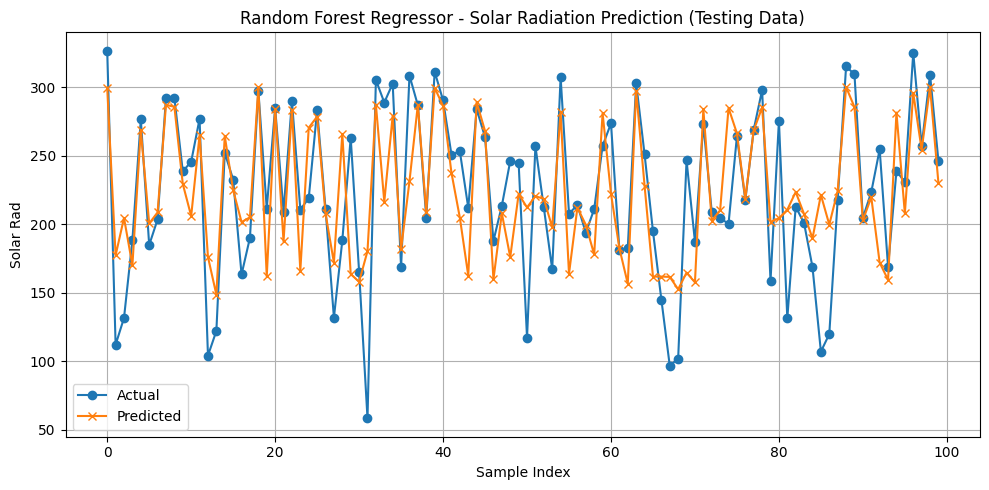

In [17]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)
evaluate_regression("Random Forest Regressor", rf,X_train, y_train, X_test, y_test)


XGBoost Regressor Regression Performance:

Train:
 MAE : 8.15
 RMSE: 10.99
 R²   : 0.962

Test:
 MAE : 30.07
 RMSE: 42.04
 R²   : 0.543


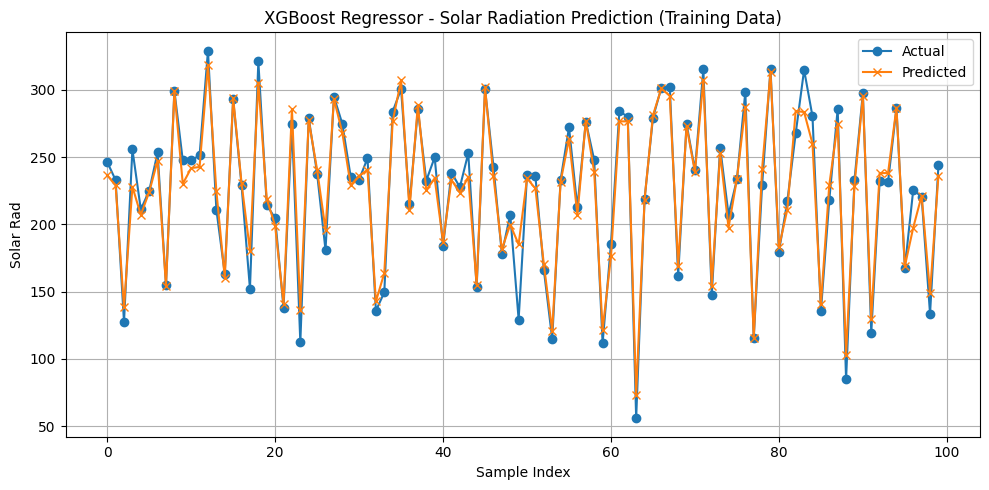

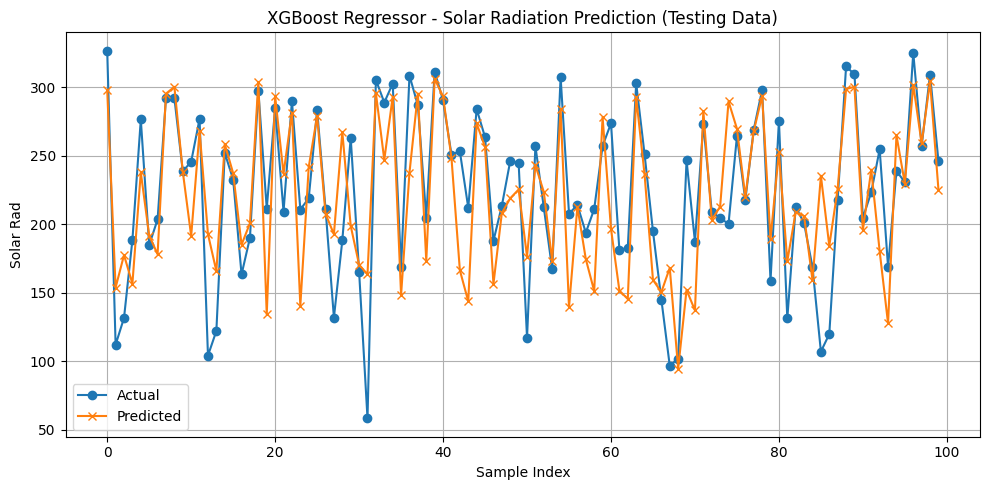

In [18]:
#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
evaluate_regression("XGBoost Regressor", xgb,X_train, y_train, X_test, y_test)


Support Vector Regressor Regression Performance:

Train:
 MAE : 28.74
 RMSE: 41.05
 R²   : 0.474

Test:
 MAE : 33.12
 RMSE: 46.70
 R²   : 0.436


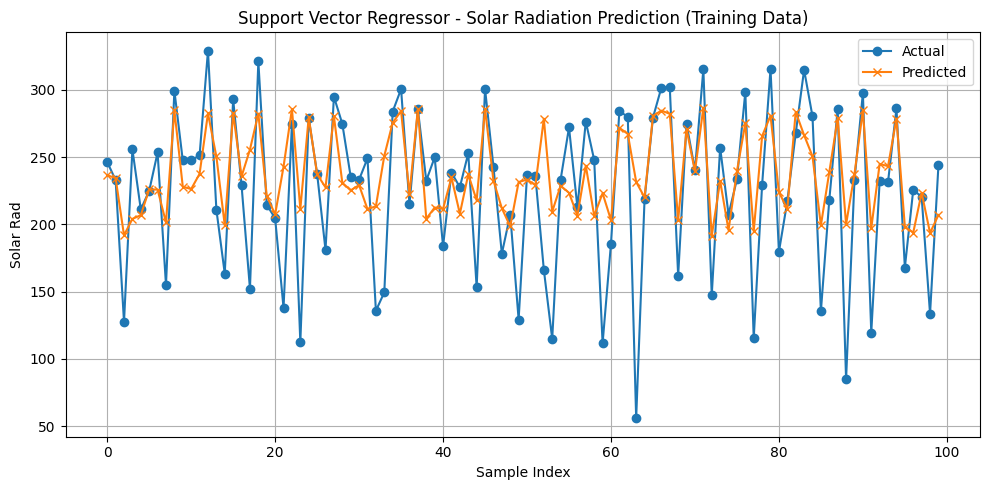

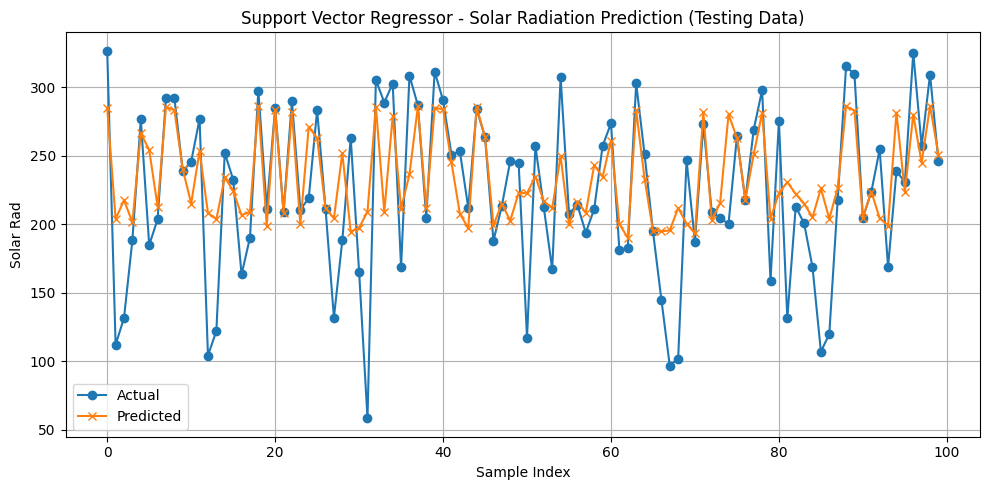

In [19]:
#SVM
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
evaluate_regression("Support Vector Regressor", svr,X_train, y_train, X_test, y_test)


Conclusion: Based on the evaluation, It can be concluded that Random Forest performed the best for solar radiation.

Solar radiation is a highly time-dependent variable influenced by a complex interplay of meteorological features. In this regression task, Random Forest emerged as the most robust and reliable model, offering the best trade-off between predictive accuracy and generalization capability.